In [149]:
from utils.summary_table_formatting import module_names_short, parameter_names_short
import pandas as pd


df_module_names = pd.DataFrame(list(module_names_short.items()), columns=['Original name', 'New name'])
df_parameter_names = pd.DataFrame(list(parameter_names_short.items()), columns=['Original', 'New name'])

df_parameter_names.to_csv('parameter_table.csv', index=False)

In [31]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability

trace_file = "../multi_parameter/final_coverage_model_multi_parameter.nc"
variable_list = ['g_mp']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = "final_coverage_interactions_multi"
limit_range = False
min_x = 0
max_x = 1


transformations = {
    #'a_m': logit_to_probability,
    #'b_p': logit_to_probability,
    #'g_mp': logit_to_probability

}

table_location = f"tables/{file_name}.csv"
image_location = f"posterior_distributions/{file_name}.png"


### Generate Summary object

In [32]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf(trace_file)

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [33]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../multi_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'Coverage')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)
summary

Module Matrix shape: (16080, 24)
Parameter Matrix shape: (16080, 66)
Interaction Matrix shape: (16080, 1584)
Observation Matrix shape: (16080, 1)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g_mp[return_from_generator x ChromLen|TestDeleteProb],-0.179,0.056,-0.264,-0.085,0.001,0.0,8933.0,10362.0,1.0
g_mp[return_from_generator x Elite|TestChangeProb],-0.138,0.052,-0.218,-0.052,0.000,0.0,11784.0,11538.0,1.0
g_mp[return_from_generator x ChromLen|Crossover],-0.101,0.048,-0.178,-0.024,0.000,0.0,15876.0,13756.0,1.0
g_mp[return_from_generator x Crossover|RandPert],-0.099,0.048,-0.176,-0.023,0.000,0.0,15735.0,13175.0,1.0
g_mp[return_from_generator x Elite|TourSize],-0.097,0.048,-0.172,-0.021,0.000,0.0,15558.0,13410.0,1.0
...,...,...,...,...,...,...,...,...,...
g_mp[positional_validation x ChromLen|Pop],0.099,0.049,0.018,0.173,0.000,0.0,16464.0,14128.0,1.0
g_mp[return_from_generator x Crossover|TestInsertProb],0.126,0.053,0.040,0.208,0.000,0.0,13501.0,11849.0,1.0
g_mp[return_from_generator x RandPert|TestInsertionProb],0.173,0.059,0.078,0.264,0.001,0.0,9368.0,9537.0,1.0
g_mp[return_from_generator x StatemInsertProb|TestChangeProb],0.174,0.059,0.077,0.266,0.001,0.0,9247.0,11045.0,1.0


### Save summary table as CSV

In [34]:
summary.to_csv(table_location, index=True)

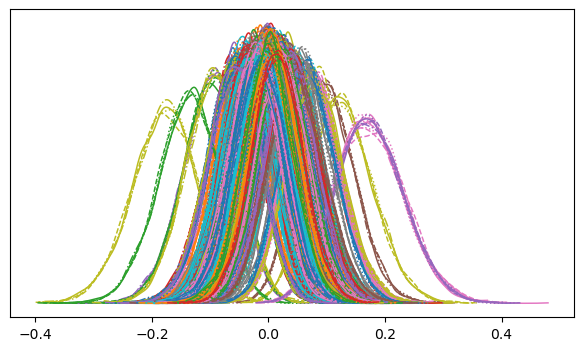

In [35]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4))
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)

if limit_range:
    axes[0, 0].set_xlim([min_x, max_x])


plt.savefig(image_location, format='png', bbox_inches='tight', dpi=600)
plt.show()